# 2014222 - Semester 2 CA-02 -May 2024

### Github account

https://github.com/2014222-student-cct-ie/2024--Semester-2--CA2/

### Analysis of a large dataset gleaned from the twitter API and is available on Moodle as “ProjectTweets.csv”

# Part 1

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.sql.types import FloatType


# For normalization
from pyspark.ml.feature import MinMaxScaler 
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


# process the tweets data
# !pip install textblob
from pyspark.sql.functions import udf
from textblob import TextBlob

# pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from pyspark.sql import DataFrame

# re module provides regular expression support.
# In Python a regular expression search is typically written as:
# match = re. search(pat, str)
# The re.search() method takes a regular expression pattern and a string and searches
# for that pattern within the string.

import re

from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# pip install --upgrade pandas

#!pip install pyspark

#!pip install pyspark pandas

# Import the warnings module

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

/Users/geomarmunoz/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read the CSV file by applying the pd.read_csv() function.

tweets_dataset = pd.read_csv('ProjectTweets.csv')

In [3]:
# Print the tweets_dataset

tweets_dataset

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
# Print the dimensions of the tweets_dataset DataFrame.

tweets_dataset.shape

(1599999, 6)

As we can see that the tweets dataframe contains 1599999 rows × 6 columns

In [5]:
# Print the first 5 rows of the tweets dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

tweets_dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
# Getting several unique values in each columnan the data description the tweets dataframe
# by applying the .nunique() method,
# Will display continuous and categorical columns in the data.
# Duplicated data can be handled or removed based on further analysis
# helps to understand the data type and information about data

tweets_dataset.nunique()

0                                                                                                                      1599999
1467810369                                                                                                             1598314
Mon Apr 06 22:19:45 PDT 2009                                                                                            774362
NO_QUERY                                                                                                                     1
_TheSpecialOne_                                                                                                         659775
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    1581465
dtype: int64

In [7]:
# Print the last 5 rows of the tweets dataframe by applying the .tail() method,
# Will display the last 5 observations of the dataset

tweets_dataset.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [8]:
# Getting information about the tweets dataframe by applying the .info() method,
# Will display number of records in each column, data having null or not null, Data type,
# memory usage of the dataset
# helps to understand the data type and information about data

tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

As we can see the tweets dataset is structured into a table with almost 1.6 million tweets, spread across six columns, each storing different pieces of information about the tweets such as ID, timestamp, query flag, user, and tweet text.

The data types vary from integers for numeric data to objects for textual data.

The tweets dataset doesn't have proper headers, which is why pandas is using the first row as column names by default.

Therefore we need to clean this by assigning proper column names.

In [9]:
# Assigning proper column names.

columns = ['index', 'tweet_ID', 'date_timestamp', 'query', 'twitter_user', 'tweet_text']

tweets_dataset = pd.read_csv('ProjectTweets.csv',header=None,names=columns,delimiter=',')

tweets_dataset.head()

,index,tweet_ID,date_timestamp,query,twitter_user,tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**As we can see the column index has a duplicate.**

In [10]:
# Drop the column called 'Index'

tweets_dataset = tweets_dataset.drop(columns=['index'])

In [11]:
# Display the tweets_dataset to confirm the column has been dropped

tweets_dataset.head()

,tweet_ID,date_timestamp,query,twitter_user,tweet_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


The column called query only has 1 value which says NO_QUERY

Therefore I am going to drop this column

In [12]:
# Drop the column called 'Query'

if len(tweets_dataset['query'].unique()) <2:
    
    print("The column called query only has 1 value which says NO_QUERY,"
          "\nTherefore we are going to drop this column\n")
    
    tweets_dataset = tweets_dataset[[ 'tweet_ID', 'date_timestamp', 'twitter_user','tweet_text']]
    
    print(tweets_dataset.columns)

The column called query only has 1 value which says NO_QUERY,
Therefore we are going to drop this column

Index(['tweet_ID', 'date_timestamp', 'twitter_user', 'tweet_text'], dtype='object')


In [13]:
# Drop Duplicates

tweets_dataset = tweets_dataset.drop_duplicates()

In [14]:
# Print the first 5 rows of the tweets dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

tweets_dataset.head()

,tweet_ID,date_timestamp,twitter_user,tweet_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
# Check the information again to see how many entries remain

tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598315 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tweet_ID        1598315 non-null  int64 
 1   date_timestamp  1598315 non-null  object
 2   twitter_user    1598315 non-null  object
 3   tweet_text      1598315 non-null  object
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


**This information is helpful for diagnosing issues with data processing and understanding the structure of the Tweets dataset.**

In [16]:
# Identifying missing values in the Tweets dataframe by applying the .isna().sum() methods,
# I am using this to get the number of missing records in each column

tweets_dataset.isnull().sum()

tweet_ID          0
date_timestamp    0
twitter_user      0
tweet_text        0
dtype: int64

In [17]:
# Resetting the index

tweets_dataset.reset_index(drop=True, inplace=True)

In [18]:
# Check Resetting the index

tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598315 entries, 0 to 1598314
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tweet_ID        1598315 non-null  int64 
 1   date_timestamp  1598315 non-null  object
 2   twitter_user    1598315 non-null  object
 3   tweet_text      1598315 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


## Cleaning the text on the tweets.

The dataset has so many, @ mentions, hashtags, retweets, hyperlinks, and colons, emojis, unicode characters from a string, emoticons, dingbats, symbols & pictographs, transport & map symbols, flags (iOS), Chinese characters, etc.

The idea is to clean te text on all the tweets

In [19]:
# Printing only the 'tweet_text' column

# print(tweets_dataset['tweet_text'].head(30))

tweets_dataset.head(30)

,tweet_ID,date_timestamp,twitter_user,tweet_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
5,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
6,1467811592,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug
7,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,1467811795,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,1467812025,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?


In [20]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [21]:
def clean_tweet(tweet):
    
    # Remove @mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove retweets
    tweet = re.sub(r'RT[\s]+', '', tweet)
    
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    
    # Remove colons (often from RTs)
    tweet = tweet.replace(':', '')
    
    # Remove emojis and various unicode characters
    tweet = re.sub(r'[\U00010000-\U0010ffff]|[\U00002600-\U000027BF]|[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F1E0-\U0001F1FF]|[\u4e00-\u9fff]', '', tweet)
    
    # Remove em dash
    tweet = tweet.replace('—', '')
    
    return tweet.strip()


In [22]:
# Apply the function for punctuation to the entire column

tweets_dataset['cleaned_tweet_text'] = tweets_dataset['tweet_text'].apply(remove_punctuation)

In [23]:
# Apply the function for all the rest of special characters to the entire column

tweets_dataset['cleaned_tweet_text'] = tweets_dataset['tweet_text'].apply(clean_tweet)

In [24]:
tweets_dataset.head(10)

,tweet_ID,date_timestamp,twitter_user,tweet_text,cleaned_tweet_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Davi..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to sa...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ..."
5,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,1467811592,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug,Need a hug
7,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! Yes.. Rains a bit ,only..."
8,1467811795,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they didn't have it
9,1467812025,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?,que me muera ?


In [25]:
# Drop the column 'tweet_text'
tweets_dataset = tweets_dataset.drop(['tweet_text'], axis=1)

# Display the DataFrame columns to verify
print("Columns after dropping 'tweet_text':")
print(tweets_dataset.columns)

Columns after dropping 'tweet_text':
Index(['tweet_ID', 'date_timestamp', 'twitter_user', 'cleaned_tweet_text'], dtype='object')


In [26]:
tweets_dataset.head()

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,I dived many times for the ball. Managed to sa...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"no, it's not behaving at all. i'm mad. why am ..."


In [27]:
# Check for missing values
missing_values = tweets_dataset.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Check for duplicates
duplicates = tweets_dataset.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing values in each column:
tweet_ID              0
date_timestamp        0
twitter_user          0
cleaned_tweet_text    0
dtype: int64

Number of duplicate rows: 0


## Missing values on days with tweets and days with no tweets

As we can see there are not missing values on the columns date_timestamp and cleaned_tweet_text

However, some days the users does not tweet.

Therefore, I want to know which days have tweets and which days don't have any tweets.

In [28]:
# Inspect the DataFrame columns
print("Columns in the dataset:")
print(tweets_dataset.columns)

# Check for missing values in specific columns
missing_date_timestamp = tweets_dataset['date_timestamp'].isnull().sum()
missing_cleaned_tweet_text = tweets_dataset['cleaned_tweet_text'].isnull().sum()
print(f"Missing values in 'date_timestamp': {missing_date_timestamp}")
print(f"Missing values in 'cleaned_tweet_text': {missing_cleaned_tweet_text}")

# Convert 'date_timestamp' to datetime format and then format to DD-MM-YYYY HH:MM:SS
tweets_dataset['date_timestamp'] = pd.to_datetime(tweets_dataset['date_timestamp'], errors='coerce')
tweets_dataset['date_timestamp'] = tweets_dataset['date_timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Extract the date part
tweets_dataset['date'] = pd.to_datetime(tweets_dataset['date_timestamp'], format='%d-%m-%Y %H:%M:%S').dt.date

# Group by date and count the number of tweets per day
tweets_per_day = tweets_dataset.groupby('date').size().reset_index(name='tweet_count')

# Convert the date format to DD/MM/YYYY
tweets_per_day['date'] = pd.to_datetime(tweets_per_day['date']).dt.strftime('%d/%m/%Y')

# Print the days with tweets
print("\nDays with tweets:")
print(tweets_per_day)

# Identify the days without any tweets
# First, create a date range from the minimum to the maximum date in the dataset
date_range = pd.date_range(start=tweets_dataset['date'].min(), end=tweets_dataset['date'].max())

# Convert the date range to a DataFrame
all_dates = pd.DataFrame(date_range, columns=['date'])

# Ensure both 'date' columns are of the same format (string) for the merge
all_dates['date'] = all_dates['date'].dt.strftime('%d/%m/%Y')
tweets_per_day['date'] = tweets_per_day['date'].astype(str)

# Merge with the tweets_per_day to find missing dates
missing_days = all_dates.merge(tweets_per_day, on='date', how='left')
missing_days['tweet_count'].fillna(0, inplace=True)

# Print the days without tweets
print("\nDays without tweets:")
print(missing_days[missing_days['tweet_count'] == 0])

# Drop the temporary 'date' column from the original dataset
tweets_dataset.drop(columns=['date'], inplace=True)

# Reset the index of the resulting DataFrame
tweets_dataset.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame to verify the changes
print("\nDataFrame after removing days without tweets and resetting the index:")

Columns in the dataset:
Index(['tweet_ID', 'date_timestamp', 'twitter_user', 'cleaned_tweet_text'], dtype='object')
Missing values in 'date_timestamp': 0
Missing values in 'cleaned_tweet_text': 0

Days with tweets:
          date  tweet_count
0   06/04/2009         3354
1   07/04/2009        17289
2   17/04/2009         3083
3   18/04/2009        21732
4   19/04/2009        27433
5   20/04/2009        18433
6   21/04/2009         8579
7   01/05/2009         7708
8   02/05/2009        27402
9   03/05/2009        35288
10  04/05/2009        15457
11  09/05/2009        11732
12  10/05/2009        25984
13  11/05/2009         4184
14  13/05/2009         4063
15  14/05/2009        17431
16  16/05/2009         9135
17  17/05/2009        40106
18  18/05/2009        36415
19  21/05/2009         2128
20  22/05/2009        39018
21  23/05/2009          169
22  25/05/2009          169
23  26/05/2009        10770
24  27/05/2009          839
25  28/05/2009        15885
26  29/05/2009        73755
2

# Removing days without tweets and resetting the index:

In [29]:
# Convert 'date_timestamp' to datetime format
tweets_dataset['date_timestamp'] = pd.to_datetime(tweets_dataset['date_timestamp'], errors='coerce')

# Format the 'date_timestamp' to DD-MM-YYYY
tweets_dataset['date_timestamp'] = tweets_dataset['date_timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Group by date and count the number of tweets per day
tweets_dataset['date'] = pd.to_datetime(tweets_dataset['date_timestamp'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y')
tweets_per_day = tweets_dataset.groupby('date').size().reset_index(name='tweet_count')

# Filter out the rows corresponding to days without tweets
tweets_dataset = tweets_dataset[tweets_dataset['date'].isin(tweets_per_day['date'])]

# Reset the index of the resulting DataFrame
tweets_dataset.reset_index(drop=True, inplace=True)

# Drop the temporary 'date' column
tweets_dataset.drop(columns=['date'], inplace=True)

# Print the resulting DataFrame to verify the changes
print("\nDataFrame after removing days without tweets and resetting the index:")


DataFrame after removing days without tweets and resetting the index:


In [30]:
# Print the first 5 rows

tweets_dataset.head()

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text
0,1467810369,04-06-2009 22:19:45,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi..."
1,1467810672,04-06-2009 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,04-06-2009 22:19:53,mattycus,I dived many times for the ball. Managed to sa...
3,1467811184,04-06-2009 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,04-06-2009 22:19:57,Karoli,"no, it's not behaving at all. i'm mad. why am ..."


In [31]:
# DataFrame after removing days without tweets and resetting the index:

tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638479 entries, 0 to 638478
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   tweet_ID            638479 non-null  int64 
 1   date_timestamp      638479 non-null  object
 2   twitter_user        638479 non-null  object
 3   cleaned_tweet_text  638479 non-null  object
dtypes: int64(1), object(3)
memory usage: 19.5+ MB


In [32]:
# Exporting the DataFrame to a CSV file

tweets_dataset.to_csv('cleaned_tweet_dataset.csv', index=False)

#print('The CSV cleaned_tweet_dataset file has been created successfully.')

# Initialize a SparkSession


In [33]:
spark = SparkSession.builder \
    .appName("CA2 Tweets Data Analysis") \
    .getOrCreate()

24/05/14 21:58:36 WARN Utils: Your hostname, Geomars-Mac-Studio.local resolves to a loopback address: 127.0.0.1; using 192.168.0.108 instead (on interface en0)
24/05/14 21:58:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/14 21:58:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/14 21:58:37 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [34]:
# Define the schema of the tweets dataset

schema = StructType([
    StructField("tweet_ID", IntegerType(), True),
    StructField("date_timestamp", StringType(), True),
    StructField("twitter_user", StringType(), True),
    StructField("cleaned_tweet_text", StringType(), True)
])

# Load the dataset previosly saved with the colomuns
# Tweet ID, Date / Timestamp,  Twitter User, Tweet text

tweets_dataset = spark.read.csv('cleaned_tweet_dataset.csv', schema=schema, header=False)

# tweets_dataset = spark.read.csv('clean_table_tweets_dataset.csv', schema=schema, header=False)

# Show the first top 20 rows

tweets_dataset.show()

# Print the schema to verify

tweets_dataset.printSchema()

+----------+-------------------+---------------+--------------------+
|  tweet_ID|     date_timestamp|   twitter_user|  cleaned_tweet_text|
+----------+-------------------+---------------+--------------------+
|      NULL|     date_timestamp|   twitter_user|  cleaned_tweet_text|
|1467810369|04-06-2009 22:19:45|_TheSpecialOne_|- Awww, that's a ...|
|1467810672|04-06-2009 22:19:49|  scotthamilton|is upset that he ...|
|1467810917|04-06-2009 22:19:53|       mattycus|I dived many time...|
|1467811184|04-06-2009 22:19:57|        ElleCTF|my whole body fee...|
|1467811193|04-06-2009 22:19:57|         Karoli|no, it's not beha...|
|1467811372|04-06-2009 22:20:00|       joy_wolf|  not the whole crew|
|1467811592|04-06-2009 22:20:03|        mybirch|          Need a hug|
|1467811594|04-06-2009 22:20:03|           coZZ|hey  long time no...|
|1467811795|04-06-2009 22:20:05|2Hood4Hollywood|nope they didn't ...|
|1467812025|04-06-2009 22:20:09|        mimismo|      que me muera ?|
|1467812416|04-06-20

In [35]:
# The describe() function is a method that provides descriptive statistics which summarize the central tendency,
# dispersion, and shape of a dataset’s distribution, excluding NaN values.
# In this case, describe() function helps me. to see statistics like count, mean, standard deviation,
# minimum, and maximum values for each column in the original DataFrame (tweets_dataset).
# If the columns are categorical, it will include the count, unique, top, and frequency of the top value.

# I am also using The show() function to display the DataFrame in a tabular format.
# This is particularly useful when working in a console or interactive environment (like a Jupyter notebook).
# It makes the data easier to understand and inspect visually.

tweets_dataset.describe().show()

24/05/14 21:58:40 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+-------------------+--------------------+--------------------+
|summary|            tweet_ID|     date_timestamp|        twitter_user|  cleaned_tweet_text|
+-------+--------------------+-------------------+--------------------+--------------------+
|  count|              638479|             638480|              638480|              637287|
|   mean|1.9503353905635595E9|               NULL| 7.202543698336065E9|2.2369040033333334E8|
| stddev|1.5920841670004314E8|               NULL|7.420310902926073E10| 6.710707840000193E8|
|    min|          1467810369|04-06-2009 22:19:45|        000catnap000|                   !|
|    max|          2072532109|     date_timestamp|     zzzyourdreamzzz|ï¿½ï¿½ï¿½ After t...|
+-------+--------------------+-------------------+--------------------+--------------------+



# Part 2

## Sentiment Analysis of the tweets

Tweets are a great way to get qualitative data because they show feelings, thoughts, and responses.

Sentiment analysis turns these feelings into numbers that can be used for statistical analysis.

This helps to find bigger trends and patterns that might not notice just by reading.

### TextBlob Sentiment Analysis

**I am using TextBlob library, which provides a simple API for common natural language processing (NLP) tasks, including sentiment analysis.**

In [36]:
# A User Defined Function (UDF) allows me to integrate custom Python logic into Spark DataFrame operations.
# Here, I am creatting a UDF that uses TextBlob to perform sentiment analysis.

def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity

# Register the User Defined Function (UDF)

sentiment_udf = udf(sentiment_analysis, FloatType())

In [37]:
# Apply the sentiment analysis UDF

tweets_dataset = tweets_dataset.withColumn("score_TextBlob", sentiment_udf(tweets_dataset['cleaned_tweet_text']))

In [38]:
# Selecting and displaying only the required columns

tweets_dataset.select("cleaned_tweet_text", "score_TextBlob").show()

+--------------------+--------------+
|  cleaned_tweet_text|score_TextBlob|
+--------------------+--------------+
|  cleaned_tweet_text|           0.0|
|- Awww, that's a ...|    0.21666667|
|is upset that he ...|           0.0|
|I dived many time...|           0.5|
|my whole body fee...|           0.2|
|no, it's not beha...|        -0.625|
|  not the whole crew|           0.2|
|          Need a hug|           0.0|
|hey  long time no...|    0.27083334|
|nope they didn't ...|           0.0|
|      que me muera ?|           0.0|
|spring break in p...|   -0.21428572|
|I just re-pierced...|           0.0|
|I couldn't bear t...|           0.0|
|It it counts, idk...|           0.0|
|i would've been t...|         0.075|
|I wish I got to w...|           0.0|
|Hollis' death sce...|           0.0|
| about to file taxes|           0.0|
|ahh ive always wa...|       0.78125|
+--------------------+--------------+
only showing top 20 rows



### Vader Sentiment Analysis

It uses a rule-based sentiment analysis framework, which excels in handling informal language typically found on Twitter, Facebook, etc.

In [39]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool
# that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/geomarmunoz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
# Function to calculate sentiment
def vader_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

# Register the UDF
vader_sentiment_udf = udf(vader_sentiment, FloatType())

In [41]:
tweets_dataset = tweets_dataset.withColumn("score_Vader", vader_sentiment_udf(tweets_dataset['cleaned_tweet_text']))

In [42]:
tweets_dataset.select("cleaned_tweet_text", "score_Vader").show()

+--------------------+-----------+
|  cleaned_tweet_text|score_Vader|
+--------------------+-----------+
|  cleaned_tweet_text|        0.0|
|- Awww, that's a ...|    -0.0173|
|is upset that he ...|      -0.75|
|I dived many time...|     0.4939|
|my whole body fee...|      -0.25|
|no, it's not beha...|    -0.6597|
|  not the whole crew|        0.0|
|          Need a hug|     0.4767|
|hey  long time no...|      0.745|
|nope they didn't ...|        0.0|
|      que me muera ?|        0.0|
|spring break in p...|        0.0|
|I just re-pierced...|        0.0|
|I couldn't bear t...|    -0.5994|
|It it counts, idk...|    -0.1027|
|i would've been t...|     0.3724|
|I wish I got to w...|     0.4545|
|Hollis' death sce...|    -0.9081|
| about to file taxes|        0.0|
|ahh ive always wa...|     0.6988|
+--------------------+-----------+
only showing top 20 rows



## TextBlob and Vader results

In [43]:
# Show the results to verify

tweets_dataset.select("cleaned_tweet_text", "score_TextBlob", "score_Vader").show()

# tweets_dataset.show()

+--------------------+--------------+-----------+
|  cleaned_tweet_text|score_TextBlob|score_Vader|
+--------------------+--------------+-----------+
|  cleaned_tweet_text|           0.0|        0.0|
|- Awww, that's a ...|    0.21666667|    -0.0173|
|is upset that he ...|           0.0|      -0.75|
|I dived many time...|           0.5|     0.4939|
|my whole body fee...|           0.2|      -0.25|
|no, it's not beha...|        -0.625|    -0.6597|
|  not the whole crew|           0.2|        0.0|
|          Need a hug|           0.0|     0.4767|
|hey  long time no...|    0.27083334|      0.745|
|nope they didn't ...|           0.0|        0.0|
|      que me muera ?|           0.0|        0.0|
|spring break in p...|   -0.21428572|        0.0|
|I just re-pierced...|           0.0|        0.0|
|I couldn't bear t...|           0.0|    -0.5994|
|It it counts, idk...|           0.0|    -0.1027|
|i would've been t...|         0.075|     0.3724|
|I wish I got to w...|           0.0|     0.4545|


# Define UDFs for Sentiment Analysis
Create UDFs for TextBlob and VADER, and also for sentiment classification:

In [44]:
# UDF for TextBlob sentiment analysis

def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

textblob_udf = udf(textblob_sentiment, FloatType())

# UDF for VADER sentiment analysis

def vader_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

vader_udf = udf(vader_sentiment, FloatType())

# UDF for sentiment classification based on the score

def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

classify_udf = udf(classify_sentiment, StringType())

In [45]:
# Apply sentiment analysis

tweets_dataset = tweets_dataset.withColumn("score_TextBlob", textblob_udf(col("cleaned_tweet_text")))
tweets_dataset = tweets_dataset.withColumn("score_Vader", vader_udf(col("cleaned_tweet_text")))

# Classify sentiments

tweets_dataset = tweets_dataset.withColumn("TextBlob_Sentiment", classify_udf(col("score_TextBlob")))
tweets_dataset = tweets_dataset.withColumn("Vader_Sentiment", classify_udf(col("score_Vader")))

In [46]:
# Print Sentiment comparison table between TextBlob_Sentiment vs Vader_Sentimen

tweets_dataset.select(['cleaned_tweet_text', 'TextBlob_Sentiment', 'Vader_Sentiment']).show()

+--------------------+------------------+---------------+
|  cleaned_tweet_text|TextBlob_Sentiment|Vader_Sentiment|
+--------------------+------------------+---------------+
|  cleaned_tweet_text|           Neutral|        Neutral|
|- Awww, that's a ...|          Positive|       Negative|
|is upset that he ...|           Neutral|       Negative|
|I dived many time...|          Positive|       Positive|
|my whole body fee...|          Positive|       Negative|
|no, it's not beha...|          Negative|       Negative|
|  not the whole crew|          Positive|        Neutral|
|          Need a hug|           Neutral|       Positive|
|hey  long time no...|          Positive|       Positive|
|nope they didn't ...|           Neutral|        Neutral|
|      que me muera ?|           Neutral|        Neutral|
|spring break in p...|          Negative|        Neutral|
|I just re-pierced...|           Neutral|        Neutral|
|I couldn't bear t...|           Neutral|       Negative|
|It it counts,

We can see that **Vader Sentiment is more accurate** because is tuned for sentiments expressed in social media and is optimized to understand text that includes emojis, slang, and shorthand, which makes it highly effective for datasets primarily composed of social media commentary.

### Save the DataFrame to a new CSV using spark enviroment

In [47]:
# save the DataFrame to a new CSV file where cleaned_tweet_text TextBlob_Sentiment and Vader_Sentiment
# are included

# tweets_dataset.write.csv('tweets_all_included.csv', header=True)

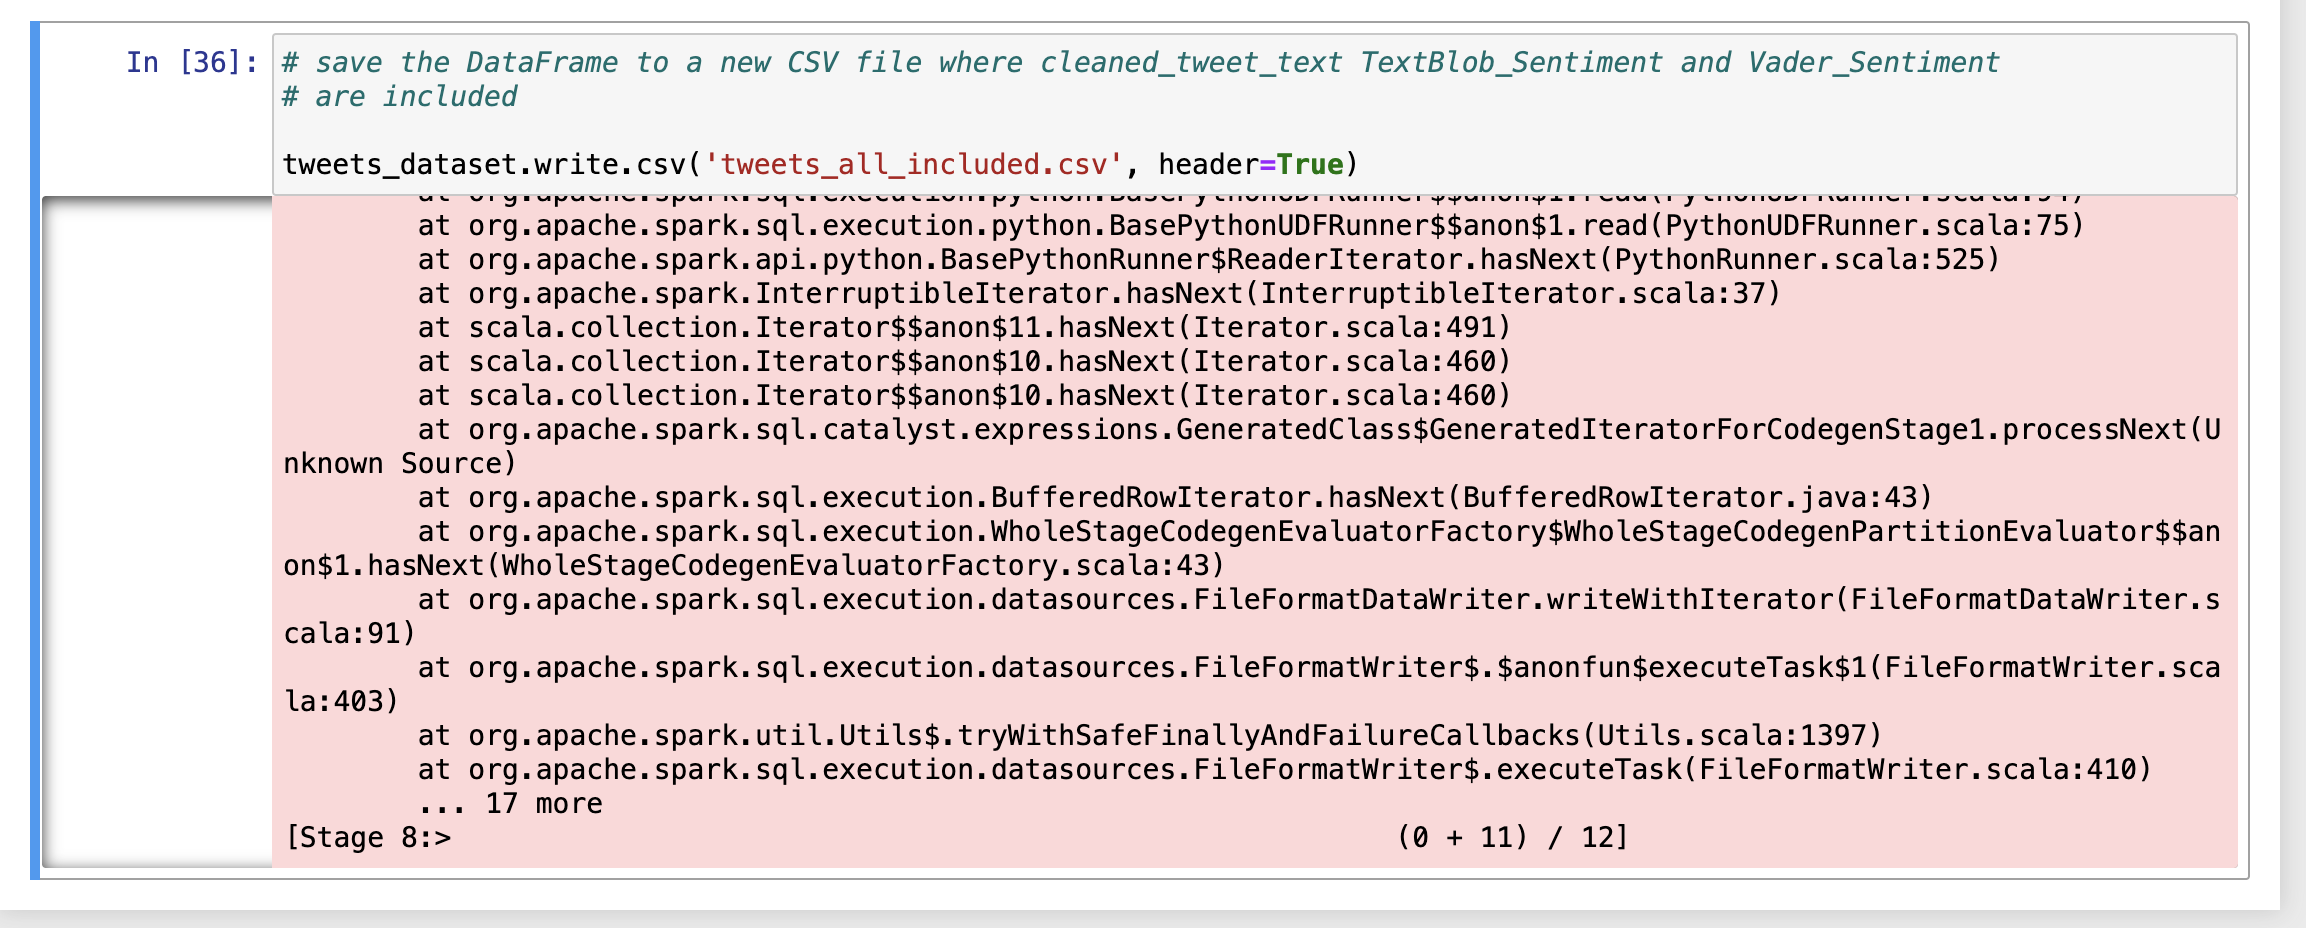

In [48]:
# pyspark dataframe conversted to Pandas Dataframe
#pandas_df = df.toPandas()

# pyspark dataframe conversted to Pandas Dataframe
# pandas_tweets_dataset = tweets_dataset.toPandas()